In [1]:
# download the dataset

from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rumethsandinu","key":"2f7fd649f72478e1bb12524e02d5bc50"}'}

In [2]:
import os
os.makedirs('/root/.kaggle', exist_ok=True)
!mv kaggle.json /root/.kaggle/

In [3]:
!pip install -q kaggle

In [4]:
!kaggle datasets download -d ismailnasri20/driver-drowsiness-dataset-ddd

Dataset URL: https://www.kaggle.com/datasets/ismailnasri20/driver-drowsiness-dataset-ddd
License(s): unknown


In [5]:
!unzip driver-drowsiness-dataset-ddd.zip -d /content/driver_drowsiness_dataset

Streaming output truncated to the last 5000 lines.
  inflating: /content/driver_drowsiness_dataset/Driver Drowsiness Dataset (DDD)/Non Drowsy/y0082.png  
  inflating: /content/driver_drowsiness_dataset/Driver Drowsiness Dataset (DDD)/Non Drowsy/y0083.png  
  inflating: /content/driver_drowsiness_dataset/Driver Drowsiness Dataset (DDD)/Non Drowsy/y0084.png  
  inflating: /content/driver_drowsiness_dataset/Driver Drowsiness Dataset (DDD)/Non Drowsy/y0085.png  
  inflating: /content/driver_drowsiness_dataset/Driver Drowsiness Dataset (DDD)/Non Drowsy/y0086.png  
  inflating: /content/driver_drowsiness_dataset/Driver Drowsiness Dataset (DDD)/Non Drowsy/y0087.png  
  inflating: /content/driver_drowsiness_dataset/Driver Drowsiness Dataset (DDD)/Non Drowsy/y0088.png  
  inflating: /content/driver_drowsiness_dataset/Driver Drowsiness Dataset (DDD)/Non Drowsy/y0089.png  
  inflating: /content/driver_drowsiness_dataset/Driver Drowsiness Dataset (DDD)/Non Drowsy/y0090.png  
  inflating: /content/

In [6]:
import os
os.listdir('/content/driver_drowsiness_dataset')

['Driver Drowsiness Dataset (DDD)']

In [7]:
os.listdir('/content/driver_drowsiness_dataset/Driver Drowsiness Dataset (DDD)')

['Drowsy', 'Non Drowsy']

In [8]:
import torch
from torch.utils.data import DataLoader, random_split
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import torchvision
from torchvision import datasets, transforms
from torchvision.datasets import ImageFolder
import random

In [9]:
# load the dataset
dataset = datasets.ImageFolder(root="/content/driver_drowsiness_dataset/Driver Drowsiness Dataset (DDD)")

# print the class labels
print(dataset.classes)

['Drowsy', 'Non Drowsy']


In [10]:
# view dataset size

print(len(dataset))

41793


In [11]:
# number of images in each class

class_counts = {}

for _, label in dataset.samples:
    if label not in class_counts:
        class_counts[label] = 0
    class_counts[label] += 1

print(f'Drowsy: {class_counts[0]}')
print(f'Not Drowsy: {class_counts[1]}')

Drowsy: 22348
Not Drowsy: 19445


In [12]:
random.seed(43)

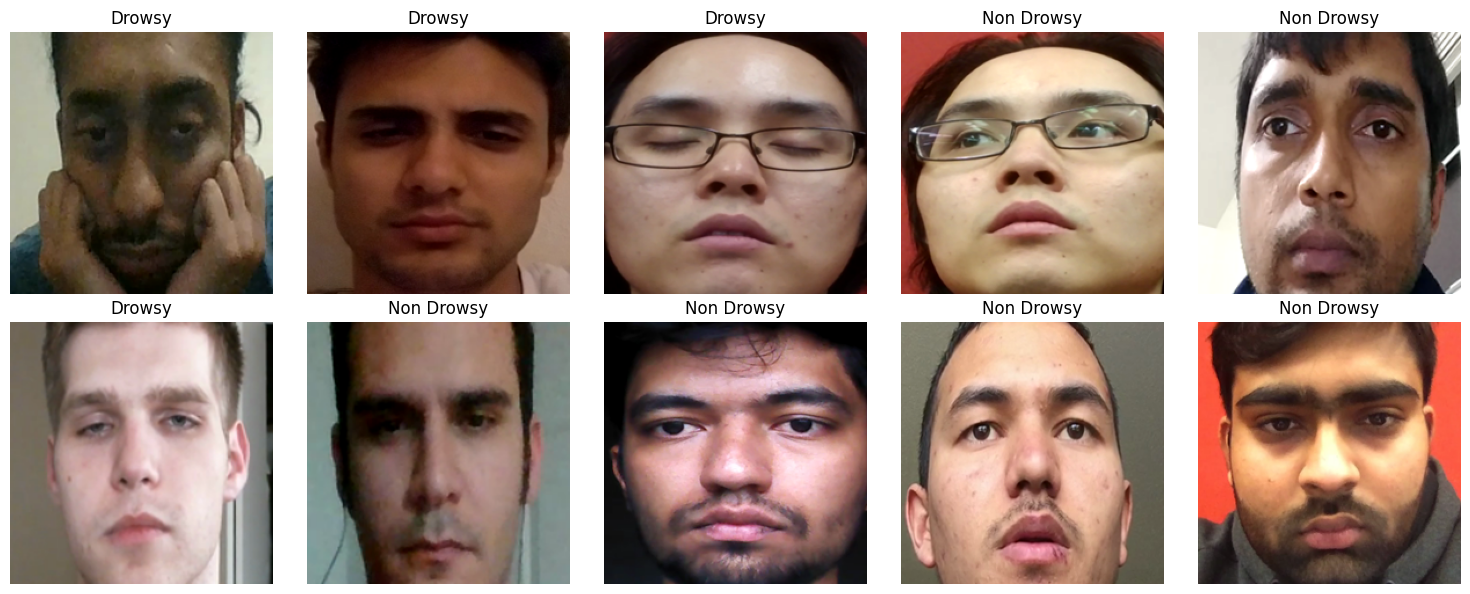

In [13]:
# print 10 random samples from the dataset

random_samples = random.sample(dataset.samples, 10)

fig, axs = plt.subplots(2, 5, figsize=(15, 6))

for i, (image_path, label) in enumerate(random_samples):
    image = Image.open(image_path)
    ax = axs[i // 5, i % 5]
    ax.imshow(image)
    ax.axis('off')
    ax.set_title(dataset.classes[label])

plt.tight_layout()
plt.show()

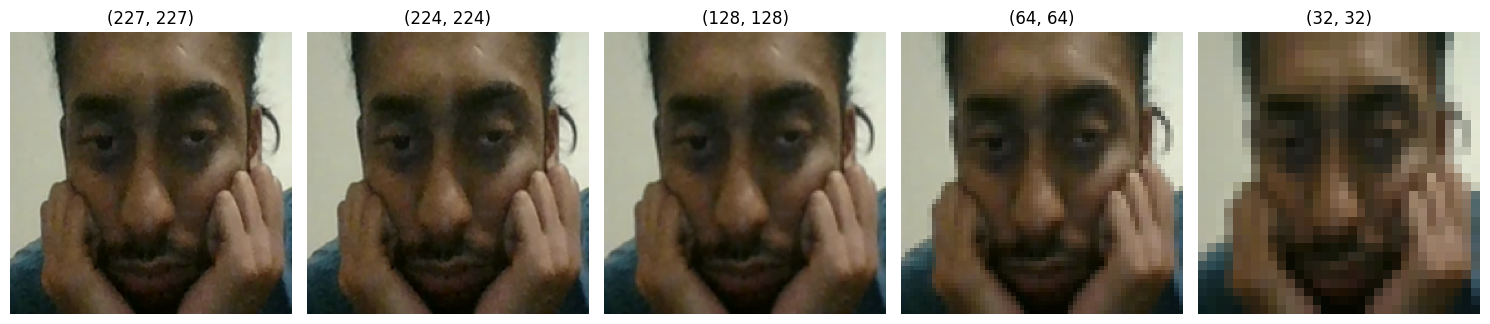

In [14]:
image = Image.open(random_samples[0][0])

# resize the image to different sizes
image_original = image
image_224 = image.resize((224, 224))
image_128 = image.resize((128, 128))
image_64 = image.resize((64, 64))
image_32 = image.resize((32, 32))

# show images
images = [image_original, image_224, image_128, image_64, image_32]

fig, axs = plt.subplots(1, 5, figsize=(15, 5))

for i, img in enumerate(images):
    axs[i].imshow(img)
    axs[i].axis('off')
    axs[i].set_title(img.size)

plt.tight_layout()
plt.show()

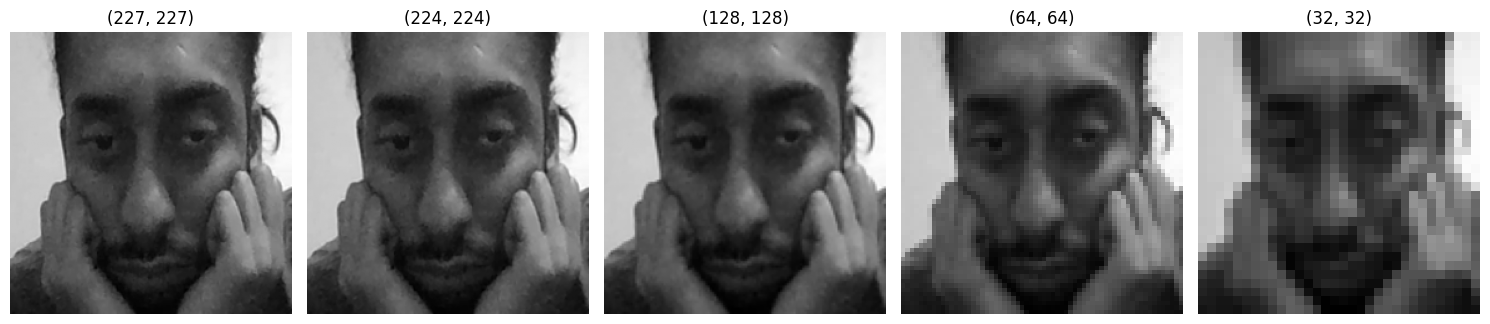

In [15]:
# convert the image to grayscale
grayscale_transform = transforms.Grayscale(num_output_channels=1)

# resize the grayscale image to different sizes
image_gray_original = grayscale_transform(image_original)
image_gray_224 = grayscale_transform(image_224)
image_gray_128 = grayscale_transform(image_128)
image_gray_64 = grayscale_transform(image_64)
image_gray_32 = grayscale_transform(image_32)

# show images
images_gray = [image_gray_original, image_gray_224, image_gray_128, image_gray_64, image_gray_32]
fig, axs = plt.subplots(1, 5, figsize=(15, 5))
for i, img in enumerate(images_gray):
    axs[i].imshow(img, cmap='gray')
    axs[i].axis('off')
    axs[i].set_title(img.size)

plt.tight_layout()
plt.show()

In [16]:
# transform pipeline

transform = transforms.Compose([
    transforms.Grayscale(num_output_channels = 1),
    transforms.Resize((128, 128)),
    transforms.RandomRotation(degrees=45),
    transforms.ToTensor(),
])

In [17]:
# transform the dataset

dataset = datasets.ImageFolder(root="/content/driver_drowsiness_dataset/Driver Drowsiness Dataset (DDD)", transform=transform)

# split the dataset
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size

train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

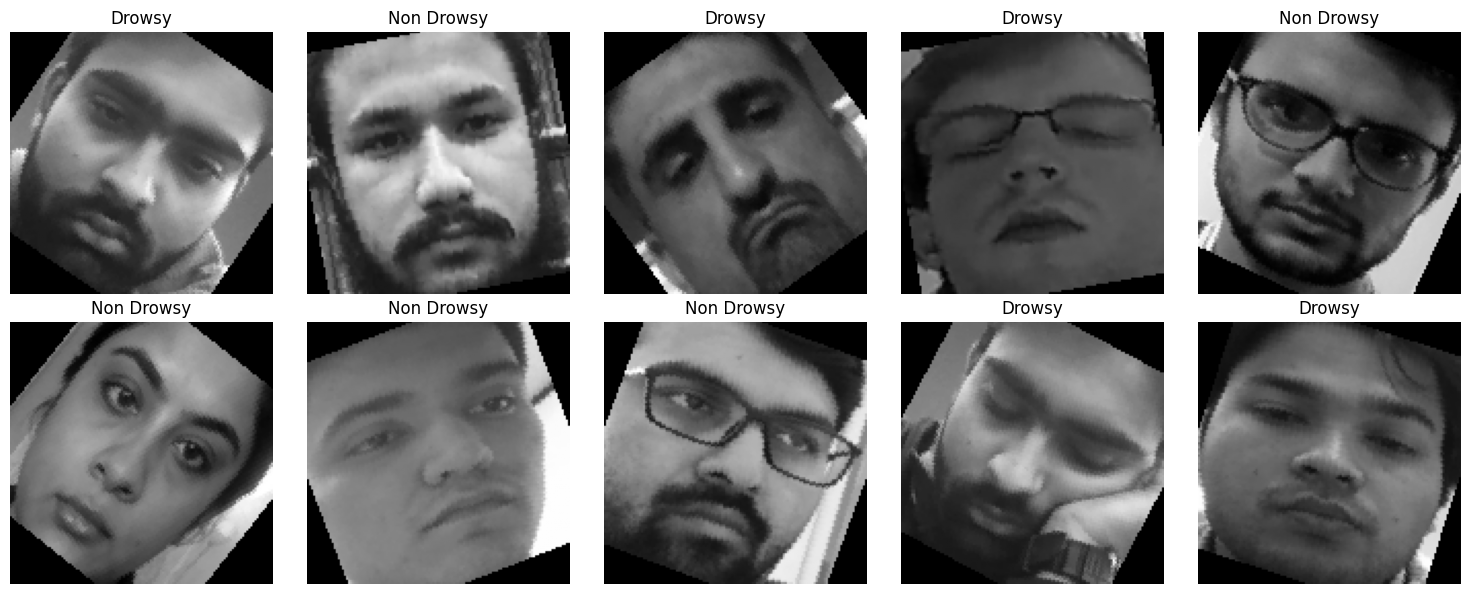

In [18]:
# show the first 10 images

images, labels = next(iter(train_loader))

fig, axs = plt.subplots(2, 5, figsize=(15, 6))
for i in range(10):
    ax = axs[i // 5, i % 5]
    ax.imshow(images[i][0], cmap='gray')
    ax.axis('off')
    ax.set_title(dataset.classes[labels[i]])

plt.tight_layout()
plt.show()

In [19]:
# check the size of dataset for each label

train_class_counts = {}
test_class_counts = {}

for _, label in train_dataset:
    if label not in train_class_counts:
        train_class_counts[label] = 0
    train_class_counts[label] += 1

for _, label in test_dataset:
    if label not in test_class_counts:
        test_class_counts[label] = 0
    test_class_counts[label] += 1

print(f'Train Drowsy: {train_class_counts[0]}')
print(f'Train Not Drowsy: {train_class_counts[1]}')
print(f'Test Drowsy: {test_class_counts[0]}')
print(f'Test Not Drowsy: {test_class_counts[1]}')

Train Drowsy: 17871
Train Not Drowsy: 15563
Test Drowsy: 4477
Test Not Drowsy: 3882


In [20]:
import torch.nn as nn
import torch.optim as optim
from torchvision import models

In [21]:
# load MobileNetV3 model without pretrained weights
model = models.mobilenet_v3_small(pretrained=False)

# modify the first convolutional layer to accept 1 input channel (grayscale)
model.features[0][0] = nn.Conv2d(1, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)

# Mmdify the final classification layer to match the number of classes
model.classifier[3] = nn.Linear(in_features=1024, out_features=1)
model = model.to('cuda' if torch.cuda.is_available() else 'cpu')

# define loss function and optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [22]:
num_epochs = 10
device = 'cuda' if torch.cuda.is_available() else 'cpu'

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        # reshape labels for BCEWithLogitsLoss
        images, labels = images.to(device), labels.to(device).float().unsqueeze(1)

        optimizer.zero_grad()

        outputs = model(images)
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        predicted = (torch.sigmoid(outputs) > 0.5).float()
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    # calculate accuracy
    train_accuracy = 100 * correct / total
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}, Accuracy: {train_accuracy:.2f}%")

Epoch [1/10], Loss: 0.1197, Accuracy: 95.08%
Epoch [2/10], Loss: 0.0271, Accuracy: 99.20%
Epoch [3/10], Loss: 0.0172, Accuracy: 99.48%
Epoch [4/10], Loss: 0.0164, Accuracy: 99.57%
Epoch [5/10], Loss: 0.0081, Accuracy: 99.78%
Epoch [6/10], Loss: 0.0115, Accuracy: 99.66%
Epoch [7/10], Loss: 0.0125, Accuracy: 99.62%
Epoch [8/10], Loss: 0.0085, Accuracy: 99.75%
Epoch [9/10], Loss: 0.0063, Accuracy: 99.81%
Epoch [10/10], Loss: 0.0070, Accuracy: 99.81%


In [23]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device).float().unsqueeze(1)
        outputs = model(images)
        predicted = (torch.sigmoid(outputs) > 0.5).float()
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

test_accuracy = 100 * correct / total
print(f'Test Accuracy: {test_accuracy:.2f}%')

Test Accuracy: 99.96%


In [24]:
torch.save(model.state_dict(), '/content/mobilenetv3_drowsiness.pth')